## Sberbank Russian Housing Market
##### Group member: Ying Zhang, Zhian Wang

In [1]:
wd = "/Users/zwang/GWU/Kaggle/Housing_Mkt/data"
import pandas as pd
import numpy as np
train_df = pd.read_csv(wd+"/train.csv")
train_df = train_df.reset_index(drop=True)
test_df = pd.read_csv(wd+"/test.csv")
test_df = test_df.reset_index(drop=True)

### Data Preparation

In [2]:
# Remove the outlier of full_sq
ind = train_df[train_df['full_sq'] > 2000].index
train_df = train_df.drop(ind)

# Remove the outliter in life_sq
ind = train_df[train_df['life_sq'] > 2000].index
train_df = train_df.drop(ind)

# Remove the outliter in kitch_sq
ind = train_df[train_df['kitch_sq'] > 500].index
train_df = train_df.drop(ind)

In [3]:
(train_df['life_sq'] > train_df['full_sq']).sum()
life_sq = train_df['life_sq'].ix[train_df['life_sq'] < train_df['full_sq']].median()
full_sq = train_df['full_sq'].median()
life_full = life_sq/full_sq 
life_full
train_df['life_sq'].ix[train_df['life_sq'] > train_df['full_sq']] = train_df['full_sq']*life_full
(train_df['life_sq'] > train_df['full_sq']).sum()

(test_df['life_sq'] > test_df['full_sq']).sum()
life_sq = test_df['life_sq'].ix[test_df['life_sq'] < test_df['full_sq']].median()
full_sq = test_df['full_sq'].median()
life_full = life_sq/full_sq 
life_full
test_df['life_sq'].ix[test_df['life_sq'] > test_df['full_sq']] = test_df['full_sq']*life_full
(test_df['life_sq'] > test_df['full_sq']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [4]:
kitch_sq = train_df['kitch_sq'].ix[train_df['kitch_sq'] < train_df['full_sq']].median()
full_sq = train_df['full_sq'].median()
kitch_full = kitch_sq/full_sq 
kitch_full
train_df['kitch_sq'].ix[train_df['kitch_sq'] > train_df['full_sq']] = train_df['full_sq']*kitch_full
(train_df['kitch_sq'] > train_df['full_sq']).sum()

kitch_sq = test_df['kitch_sq'].ix[test_df['kitch_sq'] < test_df['full_sq']].median()
full_sq = test_df['full_sq'].median()
kitch_full = kitch_sq/full_sq 
kitch_full
test_df['kitch_sq'].ix[test_df['kitch_sq'] > test_df['full_sq']] = test_df['full_sq']*kitch_full
(test_df['kitch_sq'] > test_df['full_sq']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [5]:
train_df['floor'].ix[train_df['floor'] > train_df['max_floor']] = train_df['max_floor']*0.5
(train_df['floor'] > train_df['max_floor']).sum()

test_df['floor'].ix[test_df['floor'] > test_df['max_floor']] = test_df['max_floor']*0.5
(test_df['floor'] > test_df['max_floor']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [6]:
train_df.loc[train_df['state'] == 33, 'state'] = train_df['state'].mode().iloc[0]
train_df.loc[train_df['build_year'] == 20052009, 'build_year'] = 2007
ind = train_df[(train_df['build_year'] <= 1691) | (train_df['build_year'] >= 2018)].index
by_df = train_df.drop(ind).sort_values(by=['build_year'])

### Impute Missing Value

In [7]:
train_na = train_df.isnull().sum()
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
train_na_list = train_na.index.tolist()
train_na_list

['hospital_beds_raion',
 'build_year',
 'state',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'max_floor',
 'material',
 'num_room',
 'kitch_sq',
 'preschool_quota',
 'school_quota',
 'cafe_sum_1000_max_price_avg',
 'cafe_sum_1000_min_price_avg',
 'cafe_avg_price_1000',
 'life_sq',
 'build_count_before_1920',
 'build_count_block',
 'raion_build_count_with_material_info',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_1971-1995',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_after_1995',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_sum_2000_min_price_avg',
 'cafe_sum_2000_max_price_avg',
 'cafe_avg_price_2000',
 'cafe_sum_3000_min_price_avg',
 'cafe_sum_3000_max_price_avg',
 'cafe_avg_price_3000',


In [8]:
train_df = train_df.fillna(train_df.mean())
test_df = test_df.fillna(test_df.mean())

In [9]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

id                                       0
timestamp                                0
full_sq                                  0
life_sq                                  0
floor                                    0
max_floor                                0
material                                 0
build_year                               0
num_room                                 0
kitch_sq                                 0
state                                    0
product_type                             0
sub_area                                 0
area_m                                   0
raion_popul                              0
green_zone_part                          0
indust_part                              0
children_preschool                       0
preschool_quota                          0
preschool_education_centers_raion        0
children_school                          0
school_quota                             0
school_education_centers_raion           0
school_educ

#### Add some features

In [10]:
def add_features(df):
    
    #Floor
    df['floor_ratio'] = df['floor'] / df['max_floor'].astype(float)
    df['floor_from_top'] = df['max_floor'] - df['floor']
    #Sq areas
    df['kitch_sq_ratio'] = df['kitch_sq'] / df['full_sq'].astype(float)
    df['life_sq_ratio'] = df['life_sq'] / df['full_sq'].astype(float)
    df['full_sq_per_room'] = df['full_sq'] / df['num_room'].astype(float)
    df['life_sq_per_room'] = df['life_sq'] / df['num_room'].astype(float)
    df['full_living_sq_diff'] = df['full_sq'] - df['life_sq']

    #Date
    df["year"] = pd.to_datetime(df["timestamp"], coerce=True).dt.year
    df["month"] = pd.to_datetime(df["timestamp"], coerce=True).dt.month
    df["day"] = pd.to_datetime(df["timestamp"], coerce=True).dt.day
    df["dayofyear"] = pd.to_datetime(df["timestamp"], coerce=True).dt.dayofyear
    df["dayofweek"] = pd.to_datetime(df["timestamp"], coerce=True).dt.dayofweek
    df["weekofyear"] = pd.to_datetime(df["timestamp"], coerce=True).dt.weekofyear
    
    # Add month-year
    month_year = (df['month'] + df['year'] * 100)
    month_year_cnt_map = month_year.value_counts().to_dict()
    df['month_year_cnt'] = month_year.map(month_year_cnt_map)
    
    # Add week-year count
    week_year = (df["weekofyear"] + df['year'] * 100)
    week_year_cnt_map = week_year.value_counts().to_dict()
    df['week_year_cnt'] = week_year.map(week_year_cnt_map)
    
    # building 
    df["year_old"] = 2020- df["build_year"]
    

    return df

In [11]:
train_df = add_features(train_df)
test_df = add_features(test_df)

print(train_df.shape)
print(test_df.shape)

(30464, 308)
(7662, 307)


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:18: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead


In [13]:
# Remove timestamp column (may overfit the model in train)
train_df.drop(['timestamp'], axis=1, inplace=True)
test_df.drop(['timestamp'], axis=1, inplace=True)

In [14]:
train_df.head()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,full_living_sq_diff,year,month,day,dayofyear,dayofweek,weekofyear,month_year_cnt,week_year_cnt,year_old
0,1,43,27.0,4.0,12.559613,1.826736,1879.239962,1.909826,5.970745,2.105288,...,16.0,2011,8,20,232,5,33,3,1,140.760038
1,2,34,19.0,3.0,12.559613,1.826736,1879.239962,1.909826,5.970745,2.105288,...,15.0,2011,8,23,235,1,34,3,2,140.760038
2,3,43,29.0,2.0,12.559613,1.826736,1879.239962,1.909826,5.970745,2.105288,...,14.0,2011,8,27,239,5,34,3,2,140.760038
3,4,89,50.0,9.0,12.559613,1.826736,1879.239962,1.909826,5.970745,2.105288,...,39.0,2011,9,1,244,3,35,39,1,140.760038
4,5,77,77.0,4.0,12.559613,1.826736,1879.239962,1.909826,5.970745,2.105288,...,0.0,2011,9,5,248,0,36,39,5,140.760038


#### Log the price

In [ ]:
#train_df['price_doc_log'] = np.log1p(train_df['price_doc'])

### Variable importance

In [ ]:
"""
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
X_train = train_df.drop(labels=['timestamp', 'id', 'incineration_raion'], axis=1).dropna()
y_train = X_train['price_doc_log']
X_train.drop('price_doc_log', axis=1, inplace=True)
for f in X_train.columns:
    if X_train[f].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(X_train[f])
        X_train[f] = lbl.transform(X_train[f])
rf = RandomForestRegressor(random_state=0)
rf = rf.fit(X_train, y_train)
"""

In [ ]:
"""
fi = list(zip(X_train.columns, rf.feature_importances_))
print('## rf variable importance')
d = [print('## %-40s%s' % (i)) for i in fi[:30]]
"""

In [ ]:
#print(fi[:30])

In [ ]:
#[i[0] for i in fi[:30]]

In [ ]:
#train_df = train_df.drop('price_doc_log',axis = 1)

## Model

In [15]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch 
from h2o.estimators.xgboost import H2OXGBoostEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
import xgboost as xgb
h2o.init(nthreads=-1, max_mem_size="4g") # give h2o as much memory as possible
h2o.no_progress() # turn off h2o progress bars

import numpy as np
import pandas as pd

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_131"; Java(TM) SE Runtime Environment (build 1.8.0_131-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.131-b11, mixed mode)
  Starting server from /anaconda/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/4r/5_zmhl8n2y90_l2743gnnbj00000gn/T/tmppmpwyus0
  JVM stdout: /var/folders/4r/5_zmhl8n2y90_l2743gnnbj00000gn/T/tmppmpwyus0/h2o_zwang_started_from_python.out
  JVM stderr: /var/folders/4r/5_zmhl8n2y90_l2743gnnbj00000gn/T/tmppmpwyus0/h2o_zwang_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster version:,3.12.0.1
H2O cluster version age:,"14 days, 22 hours and 10 minutes"
H2O cluster name:,H2O_from_python_zwang_udglak
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [16]:
print(train_df.shape)
print(test_df.shape)

(30464, 307)
(7662, 306)


In [17]:
train = h2o.H2OFrame(train_df)
test = h2o.H2OFrame(test_df)

dummy_col = np.random.rand(test.shape[0])
test = test.cbind(h2o.H2OFrame(dummy_col))
cols = test.columns
cols[-1] = 'price_doc'
test.columns = cols
print(train.shape)
print(test.shape)

(30464, 307)
(7662, 307)


In [18]:
def get_type_lists(frame=train, rejects=['id', 'price_doc']):   
    nums, cats = [], []
    for key, val in frame.types.items():
        if key not in rejects:
            if val == 'enum':
                cats.append(key)
            else: 
                nums.append(key)                
    print('Numeric =', nums)                
    print()
    print('Categorical =', cats)
    
    return nums, cats

In [19]:
original_nums, cats = get_type_lists()

Numeric = ['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_

In [20]:
train, valid = train.split_frame([0.7], seed=12345)
print(train.shape)
print(valid.shape)

(21378, 307)
(9086, 307)


### Encode categorical vars using shrunken averages

In [21]:
def target_encoder(training_frame, test_frame, x, y, lambda_=0.15, threshold=150, test=False):

    # convert to pandas
    trdf = training_frame.as_data_frame().loc[:, [x,y]] # df
    tss = test_frame.as_data_frame().loc[:, x]          # series


    # create dictionary of level:encode val

    encode_name = x + '_Tencode'
    overall_mean = trdf[y].mean()
    row_val_dict = {}

    for level in trdf[x].unique():
        level_df = trdf[trdf[x] == level][y]
        level_n = level_df.shape[0]
        level_mean = level_df.mean()
        if level_n >= threshold:
            row_val_dict[level] = level_mean
        else:
            row_val_dict[level] = ((1 - lambda_) * level_mean) +\
                                  (lambda_ * overall_mean)

    row_val_dict[np.nan] = overall_mean # handle missing values

    if test:
        print(row_val_dict)

    # apply the transform to training data
    trdf[encode_name] = trdf[x].apply(lambda i: row_val_dict[i])

    # apply the transform to test data
    tsdf = pd.DataFrame(columns=[x, encode_name])
    tsdf[x] = tss
    tsdf.loc[:, encode_name] = overall_mean # handle previously unseen values
    # handle values that are seen in tsdf but not row_val_dict
    for i, col_i in enumerate(tsdf[x]):
        try:
            row_val_dict[col_i]
        except:
            # a value that appeared in tsdf isn't in the row_val_dict so just
            # make it the overall_mean
            row_val_dict[col_i] = overall_mean
    tsdf[encode_name] = tsdf[x].apply(lambda i: row_val_dict[i])


    # convert back to H2O

    trdf = h2o.H2OFrame(trdf[encode_name].as_matrix())
    trdf.columns = [encode_name]

    tsdf = h2o.H2OFrame(tsdf[encode_name].as_matrix())
    tsdf.columns = [encode_name]

    return (trdf, tsdf)

In [22]:
total = len(cats)
for i, var in enumerate(cats):
    
    tr_enc, _ = target_encoder(train, test, var, 'price_doc')
    v_enc, ts_enc = target_encoder(valid, test, var, 'price_doc')
    
    print('Encoding: ' + var + ' (' + str(i+1) + '/' + str(total) + ') ...')

    train = train.cbind(tr_enc)
    valid = valid.cbind(v_enc)
    test = test.cbind(ts_enc)    
    
print('Done.')

Encoding: product_type (1/15) ...
Encoding: sub_area (2/15) ...
Encoding: culture_objects_top_25 (3/15) ...
Encoding: thermal_power_plant_raion (4/15) ...
Encoding: incineration_raion (5/15) ...
Encoding: oil_chemistry_raion (6/15) ...
Encoding: radiation_raion (7/15) ...
Encoding: railroad_terminal_raion (8/15) ...
Encoding: big_market_raion (9/15) ...
Encoding: nuclear_reactor_raion (10/15) ...
Encoding: detention_facility_raion (11/15) ...
Encoding: water_1line (12/15) ...
Encoding: big_road1_1line (13/15) ...
Encoding: railroad_1line (14/15) ...
Encoding: ecology (15/15) ...
Done.


In [23]:
encoded_nums, cats = get_type_lists(frame=train)

Numeric = ['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_

### Log the price

price_doc
15.582
15.6073
15.556


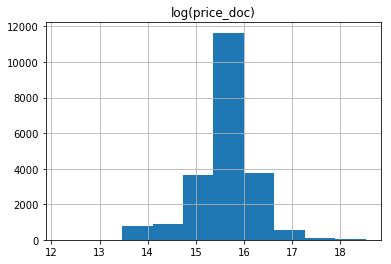

In [24]:
# Check log transform - looks good
%matplotlib inline
train['price_doc'].log().as_data_frame().hist()

# Execute log transform
train['price_doc'] = train['price_doc'].log()
valid['price_doc'] = valid['price_doc'].log()
print(train[0:3, 'price_doc'])
#print(valid[0:3, 'price_doc'])

In [25]:
print(train.shape)
print(valid.shape)
print(test.shape)

(21378, 322)
(9086, 322)
(7662, 322)


#### Define ranked predictions plot function

In [26]:
def ranked_preds_plot(y, valid, preds):
    
    """ Generates ranked prediction plot.
    
    :param y: Name of target variable.
    :param valid: Name of validation H2OFrame.
    :param preds: Column vector of predictions to plot.

    """
    
    # plot top frame values
    preds.columns = ['predict']
    yhat_frame = valid.cbind(preds)
    print(yhat_frame[0:10, [y, 'predict']])

    # plot sorted predictions
    yhat_frame_df = yhat_frame[[y, 'predict']].as_data_frame()
    yhat_frame_df.sort_values(by='predict', inplace=True)
    yhat_frame_df.reset_index(inplace=True, drop=True)
    _ = yhat_frame_df.plot(title='Ranked Predictions Plot')

### Variable importance

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1498095397446_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.23669719676101203
RMSE: 0.4865153612795921
MAE: 0.30447225794413274
RMSLE: 0.030114150213881263
Mean Residual Deviance: 0.23669719676101203

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.25551985625692347
RMSE: 0.505489719239594
MAE: 0.31181652871643295
RMSLE: 0.0314361606093039
Mean Residual Deviance: 0.25551985625692347

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.2383465523816157
RMSE: 0.4882074890675231
MAE: 0.3052507786192846
RMSLE: 0.030211631391341257
Mean Residual Deviance: 0.2383465523816157
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.3052364,0.0037644,0.3043423,0.3121576,0.2992094
mean_residual_deviance,0.2383389,0.0053991,0.2327559,0.2491349,0.2331258
mse,0.2383389,0.0053991,0.2327559,0.2491349,0.2331258
r2,0.3404527,0.0066054,0.3521683,0.3293079,0.3398820
residual_deviance,0.2383389,0.0053991,0.2327559,0.2491349,0.2331258
rmse,0.4881377,0.0054993,0.4824478,0.4991341,0.4828310
rmsle,0.0302072,0.0003456,0.0298313,0.0308976,0.0298929


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-21 21:42:45,1 min 23.779 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-06-21 21:42:45,1 min 23.967 sec,1.0,0.5308110,0.3396138,0.2817603,0.5655292,0.3623749,0.3198233
,2017-06-21 21:42:46,1 min 24.170 sec,2.0,0.5534625,0.3617748,0.3063207,0.5510524,0.3551969,0.3036587
,2017-06-21 21:42:46,1 min 24.383 sec,3.0,0.5341712,0.3351211,0.2853388,0.5166383,0.3164895,0.2669152
,2017-06-21 21:42:46,1 min 24.568 sec,4.0,0.5232888,0.3266118,0.2738312,0.5078345,0.3090444,0.2578959
---,---,---,---,---,---,---,---,---,---
,2017-06-21 21:43:12,1 min 50.443 sec,107.0,0.4856925,0.3034286,0.2358972,0.5047047,0.3107567,0.2547269
,2017-06-21 21:43:12,1 min 50.800 sec,108.0,0.4859519,0.3037313,0.2361493,0.5049113,0.3110112,0.2549354
,2017-06-21 21:43:13,1 min 51.164 sec,109.0,0.4861677,0.3039898,0.2363591,0.5050902,0.3112495,0.2551161
,2017-06-21 21:43:13,1 min 51.537 sec,110.0,0.4865015,0.3043202,0.2366837,0.5053277,0.3115526,0.2553561



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
full_sq,22220.6718750,1.0,0.0785837
num_room,12713.7226562,0.5721574,0.0449623
full_living_sq_diff,10257.8388672,0.4616350,0.0362770
sub_area_Tencode,9143.8828125,0.4115034,0.0323375
life_sq,8233.3134766,0.3705250,0.0291172
---,---,---,---
railroad_terminal_raion_Tencode,19.6329803,0.0008835,0.0000694
detention_facility_raion_Tencode,18.1225834,0.0008156,0.0000641
nuclear_reactor_raion_Tencode,11.2551060,0.0005065,0.0000398
cafe_count_500_price_high,7.3869133,0.0003324,0.0000261



See the whole table with table.as_data_frame()



price_doc,predict
16.3881,15.9405
14.5087,15.5831
14.5087,15.468
14.4307,15.6717
15.6561,15.5098
15.8824,15.4289
15.4642,15.5403
15.5905,15.4356
16.7224,15.802
15.556,15.4381


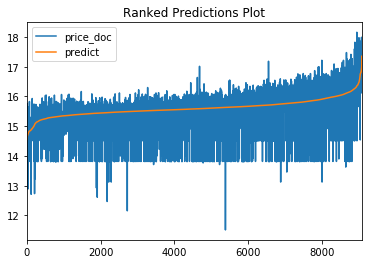

In [27]:
# initialize rf model
rf_model1 = H2ORandomForestEstimator(
    ntrees=10000,                    
    max_depth=10, 
    col_sample_rate_per_tree=0.1,
    sample_rate=0.8,
    stopping_rounds=50,
    score_each_iteration=True,
    nfolds=3,
    keep_cross_validation_predictions=True,
    seed=12345)           

# train rf model
rf_model1.train(
    x=encoded_nums,
    y='price_doc',
    training_frame=train,
    validation_frame=valid)

# print model information
print(rf_model1)

rf_preds1_val = rf_model1.predict(valid)
ranked_preds_plot('price_doc', valid, rf_preds1_val) # valid RMSE not so hot ...
rf_preds1_test = rf_model1.predict(test)

In [28]:
l = rf_model1.varimp()
FI100 = [i[0] for i in l[:100]]
FI50 = [i[0] for i in l[:50]]

In [29]:
print(FI50)

['full_sq', 'num_room', 'full_living_sq_diff', 'sub_area_Tencode', 'life_sq', 'kitch_sq_ratio', 'cafe_count_3000_price_2500', 'full_sq_per_room', 'cafe_count_3000', 'cafe_count_5000_price_high', 'cafe_count_2000', 'kitch_sq', 'cafe_count_5000_price_2500', 'cafe_count_5000_price_1500', 'sport_count_3000', 'sport_count_2000', 'cafe_count_5000', 'zd_vokzaly_avto_km', 'life_sq_per_room', 'cafe_count_2000_price_1000', 'cafe_count_1500_price_2500', 'build_year', 'swim_pool_km', 'office_sqm_5000', 'trc_count_5000', 'metro_min_avto', 'metro_km_walk', 'floor', 'nuclear_reactor_km', 'metro_km_avto', 'workplaces_km', 'week_year_cnt', 'max_floor', 'life_sq_ratio', 'cafe_count_3000_price_1500', 'ttk_km', 'green_zone_km', 'trc_count_3000', 'metro_min_walk', 'cafe_count_5000_price_1000', 'year', 'market_shop_km', 'month_year_cnt', 'year_old', 'cafe_count_3000_price_500', 'cafe_count_2000_price_2500', 'bulvar_ring_km', 'detention_facility_km', 'state', 'big_road1_km']


In [30]:
print(FI100)

['full_sq', 'num_room', 'full_living_sq_diff', 'sub_area_Tencode', 'life_sq', 'kitch_sq_ratio', 'cafe_count_3000_price_2500', 'full_sq_per_room', 'cafe_count_3000', 'cafe_count_5000_price_high', 'cafe_count_2000', 'kitch_sq', 'cafe_count_5000_price_2500', 'cafe_count_5000_price_1500', 'sport_count_3000', 'sport_count_2000', 'cafe_count_5000', 'zd_vokzaly_avto_km', 'life_sq_per_room', 'cafe_count_2000_price_1000', 'cafe_count_1500_price_2500', 'build_year', 'swim_pool_km', 'office_sqm_5000', 'trc_count_5000', 'metro_min_avto', 'metro_km_walk', 'floor', 'nuclear_reactor_km', 'metro_km_avto', 'workplaces_km', 'week_year_cnt', 'max_floor', 'life_sq_ratio', 'cafe_count_3000_price_1500', 'ttk_km', 'green_zone_km', 'trc_count_3000', 'metro_min_walk', 'cafe_count_5000_price_1000', 'year', 'market_shop_km', 'month_year_cnt', 'year_old', 'cafe_count_3000_price_500', 'cafe_count_2000_price_2500', 'bulvar_ring_km', 'detention_facility_km', 'state', 'big_road1_km', 'cafe_count_1000', 'stadium_km', 

In [31]:
# 50
FI = ['full_sq', 'num_room', 'full_living_sq_diff', 'sub_area_Tencode', 'life_sq', 'kitch_sq_ratio', 'cafe_count_3000_price_2500', 'full_sq_per_room', 'cafe_count_3000', 'cafe_count_5000_price_high', 'cafe_count_2000', 'kitch_sq', 'cafe_count_5000_price_2500', 'cafe_count_5000_price_1500', 'sport_count_3000', 'sport_count_2000', 'cafe_count_5000', 'zd_vokzaly_avto_km', 'life_sq_per_room', 'cafe_count_2000_price_1000', 'cafe_count_1500_price_2500', 'build_year', 'swim_pool_km', 'office_sqm_5000', 'trc_count_5000', 'metro_min_avto', 'metro_km_walk', 'floor', 'nuclear_reactor_km', 'metro_km_avto', 'workplaces_km', 'week_year_cnt', 'max_floor', 'life_sq_ratio', 'cafe_count_3000_price_1500', 'ttk_km', 'green_zone_km', 'trc_count_3000', 'metro_min_walk', 'cafe_count_5000_price_1000', 'year', 'market_shop_km', 'month_year_cnt', 'year_old', 'cafe_count_3000_price_500', 'cafe_count_2000_price_2500', 'bulvar_ring_km', 'detention_facility_km', 'state', 'big_road1_km']

In [ ]:
# 100
FI = ['full_sq', 'num_room', 'full_living_sq_diff', 'sub_area_Tencode', 'life_sq', 'kitch_sq_ratio', 'cafe_count_3000_price_2500', 'full_sq_per_room', 'cafe_count_3000', 'cafe_count_5000_price_high', 'cafe_count_2000', 'kitch_sq', 'cafe_count_5000_price_2500', 'cafe_count_5000_price_1500', 'sport_count_3000', 'sport_count_2000', 'cafe_count_5000', 'zd_vokzaly_avto_km', 'life_sq_per_room', 'cafe_count_2000_price_1000', 'cafe_count_1500_price_2500', 'build_year', 'swim_pool_km', 'office_sqm_5000', 'trc_count_5000', 'metro_min_avto', 'metro_km_walk', 'floor', 'nuclear_reactor_km', 'metro_km_avto', 'workplaces_km', 'week_year_cnt', 'max_floor', 'life_sq_ratio', 'cafe_count_3000_price_1500', 'ttk_km', 'green_zone_km', 'trc_count_3000', 'metro_min_walk', 'cafe_count_5000_price_1000', 'year', 'market_shop_km', 'month_year_cnt', 'year_old', 'cafe_count_3000_price_500', 'cafe_count_2000_price_2500', 'bulvar_ring_km', 'detention_facility_km', 'state', 'big_road1_km', 'cafe_count_1000', 'stadium_km', 'green_part_3000', 'big_church_km', 'prom_part_5000', 'trc_sqm_3000', 'cafe_avg_price_5000', 'additional_education_km', 'exhibition_km', 'railroad_station_avto_km', 'theater_km', 'radiation_km', 'cafe_count_3000_price_1000', 'church_synagogue_km', 'material', 'public_transport_station_km', 'sadovoe_km', 'ice_rink_km', 'big_road2_km', 'cafe_count_2000_price_1500', 'ts_km', 'public_transport_station_min_walk', 'cafe_sum_5000_min_price_avg', 'shopping_centers_km', 'green_part_1500', 'railroad_station_walk_min', 'cafe_count_1500', 'sport_count_5000', 'preschool_km', 'cafe_avg_price_2000', 'green_part_1000', 'cafe_count_1500_price_1500', 'trc_sqm_5000', 'water_treatment_km', 'product_type_Tencode', 'prom_part_1500', 'office_count_3000', 'big_market_km', 'trc_sqm_1500', 'prom_part_3000', 'cafe_sum_3000_max_price_avg', 'cafe_count_1000_price_1000', 'museum_km', 'green_part_2000', 'kremlin_km', 'school_km', 'mosque_km', 'leisure_count_3000', 'railroad_station_avto_min', 'trc_sqm_2000']

In [32]:
print(FI)

['full_sq', 'num_room', 'full_living_sq_diff', 'sub_area_Tencode', 'life_sq', 'kitch_sq_ratio', 'cafe_count_3000_price_2500', 'full_sq_per_room', 'cafe_count_3000', 'cafe_count_5000_price_high', 'cafe_count_2000', 'kitch_sq', 'cafe_count_5000_price_2500', 'cafe_count_5000_price_1500', 'sport_count_3000', 'sport_count_2000', 'cafe_count_5000', 'zd_vokzaly_avto_km', 'life_sq_per_room', 'cafe_count_2000_price_1000', 'cafe_count_1500_price_2500', 'build_year', 'swim_pool_km', 'office_sqm_5000', 'trc_count_5000', 'metro_min_avto', 'metro_km_walk', 'floor', 'nuclear_reactor_km', 'metro_km_avto', 'workplaces_km', 'week_year_cnt', 'max_floor', 'life_sq_ratio', 'cafe_count_3000_price_1500', 'ttk_km', 'green_zone_km', 'trc_count_3000', 'metro_min_walk', 'cafe_count_5000_price_1000', 'year', 'market_shop_km', 'month_year_cnt', 'year_old', 'cafe_count_3000_price_500', 'cafe_count_2000_price_2500', 'bulvar_ring_km', 'detention_facility_km', 'state', 'big_road1_km']


### Create combination features

In [33]:
def feature_combiner(training_frame, test_frame, nums):
    total = len(nums)
    
    # convert to pandas
    train_df = training_frame.as_data_frame()
    test_df = test_frame.as_data_frame()
    
    for i, col_i in enumerate(nums):
        
        print('Combining: ' + col_i + ' (' + str(i+1) + '/' + str(total) + ') ...')        
        
        for j, col_j in enumerate(nums):
            
            # don't repeat (i*j = j*i)
            if i < j:
                
                # convert to pandas
                col_i_train_df = train_df[col_i]
                col_j_train_df = train_df[col_j]
                col_i_test_df = test_df[col_i]
                col_j_test_df = test_df[col_j] 

                # multiply, convert back to h2o
                train_df[str(col_i + '|' + col_j)] = col_i_train_df.values*col_j_train_df.values
                test_df[str(col_i + '|' + col_j)] = col_i_test_df.values*col_j_test_df.values
                
    print('Done.')
    
    # convert back to h2o
    
    print('Converting to H2OFrame ...')
    
    training_frame = h2o.H2OFrame(train_df)
    training_frame.columns = list(train_df)
    test_frame = h2o.H2OFrame(test_df)
    test_frame.columns = list(test_df)
    
    print('Done.')
    print()
    
    # conserve memory 
    del train_df
    del test_df 
    
    return training_frame, test_frame

In [34]:
train, _ = feature_combiner(train, test, FI)
valid, test = feature_combiner(valid, test, FI)

Combining: full_sq (1/50) ...
Combining: num_room (2/50) ...
Combining: full_living_sq_diff (3/50) ...
Combining: sub_area_Tencode (4/50) ...
Combining: life_sq (5/50) ...
Combining: kitch_sq_ratio (6/50) ...
Combining: cafe_count_3000_price_2500 (7/50) ...
Combining: full_sq_per_room (8/50) ...
Combining: cafe_count_3000 (9/50) ...
Combining: cafe_count_5000_price_high (10/50) ...
Combining: cafe_count_2000 (11/50) ...
Combining: kitch_sq (12/50) ...
Combining: cafe_count_5000_price_2500 (13/50) ...
Combining: cafe_count_5000_price_1500 (14/50) ...
Combining: sport_count_3000 (15/50) ...
Combining: sport_count_2000 (16/50) ...
Combining: cafe_count_5000 (17/50) ...
Combining: zd_vokzaly_avto_km (18/50) ...
Combining: life_sq_per_room (19/50) ...
Combining: cafe_count_2000_price_1000 (20/50) ...
Combining: cafe_count_1500_price_2500 (21/50) ...
Combining: build_year (22/50) ...
Combining: swim_pool_km (23/50) ...
Combining: office_sqm_5000 (24/50) ...
Combining: trc_count_5000 (25/50) 

In [35]:
encoded_combined_nums, cats = get_type_lists(frame=train)

Numeric = ['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_

In [36]:
#encoded_combined_nums

In [ ]:
newtrain_df = train.as_data_frame()
newvalid_df = valid.as_data_frame()
newtest_df = test.as_data_frame()

In [ ]:
#newtest_df.head()

In [ ]:
newvalid_df.to_csv('/Users/zwang/GWU/Kaggle/Housing_Mkt/data/newvalid.csv')
newtrain_df.to_csv('/Users/zwang/GWU/Kaggle/Housing_Mkt/data/newtrain.csv')
newtest_df.to_csv('/Users/zwang/GWU/Kaggle/Housing_Mkt/data/newtest.csv')

#### Function to generate submission file

In [37]:
import re
import time

def gen_submission(preds, test=test):
    # create time stamp
    time_stamp = re.sub('[: ]', '_', time.asctime())

    # create predictions column
    sub = test['id'].cbind(preds.exp())
    sub.columns = ['id', 'price_doc']
    
    # save file for submission
    sub_fname = wd+'/submission_' + str(time_stamp) + '.csv'
    h2o.download_csv(sub, sub_fname)
    return sub

### Native XGBoost

In [38]:

ave_y = train['price_doc'].mean()[0] ###

# XGBoost uses SVMLight data structure, not Numpy arrays or Pandas data frames 
dtrain1 = xgb.DMatrix(train.as_data_frame()[encoded_combined_nums],
                      train.as_data_frame()['price_doc'], feature_names = encoded_combined_nums) ###
dvalid1 = xgb.DMatrix(valid.as_data_frame()[encoded_combined_nums],
                      valid.as_data_frame()['price_doc'], feature_names = encoded_combined_nums)
dtest = xgb.DMatrix(test.as_data_frame()[encoded_combined_nums], feature_names = encoded_combined_nums)



In [41]:
# tuning parameters
params1 = {
    'objective': 'reg:linear',
    'booster': 'gbtree', 
    'eval_metric': 'rmse',
    'eta': 0.05, #0.005
    'subsample': 1, ##0.1
    'colsample_bytree': 0.7, ## 0.8
    'max_depth': 5,
    'reg_alpha' : 0.007,
    'reg_lambda' : 0.0,
    'base_score': ave_y,
    'silent': 1,  ##0
    'seed': 12345,
}

# watchlist is used for early stopping
watchlist = [(dtrain1, 'train'), (dvalid1, 'eval')]

# train model
xgb_model1 = xgb.train(params1, 
                       dtrain1, 
                       1000,  #10000
                       evals=watchlist, 
                       early_stopping_rounds=50,   ###
                       verbose_eval=True)

num_boost_round = xgb_model1.best_iteration

# create assessment stats and submission file
#xgb_preds1_val = h2o.H2OFrame(xgb_model1.predict(dvalid1).tolist())
#ranked_preds_plot('price_log', valid, xgb_preds1_val) 
#xgb_preds1_test = h2o.H2OFrame(xgb_model1.predict(dtest).tolist())
#gen_submission(xgb_preds1_test) 


[0]	train-rmse:0.589309	eval-rmse:0.602181
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 50 rounds.
[1]	train-rmse:0.578856	eval-rmse:0.593019
[2]	train-rmse:0.568711	eval-rmse:0.584446
[3]	train-rmse:0.559515	eval-rmse:0.576484
[4]	train-rmse:0.551162	eval-rmse:0.569441
[5]	train-rmse:0.542967	eval-rmse:0.562563
[6]	train-rmse:0.53542	eval-rmse:0.556299
[7]	train-rmse:0.528495	eval-rmse:0.5506
[8]	train-rmse:0.522061	eval-rmse:0.545389
[9]	train-rmse:0.516115	eval-rmse:0.540568
[10]	train-rmse:0.510571	eval-rmse:0.536125
[11]	train-rmse:0.505396	eval-rmse:0.532123
[12]	train-rmse:0.500661	eval-rmse:0.528449
[13]	train-rmse:0.496293	eval-rmse:0.525059
[14]	train-rmse:0.492218	eval-rmse:0.52189
[15]	train-rmse:0.488356	eval-rmse:0.518766
[16]	train-rmse:0.484813	eval-rmse:0.516135
[17]	train-rmse:0.481581	eval-rmse:0.513849
[18]	train-rmse:0.478504	eval-rmse:0.511653
[19]	train-rmse:0.475662	eval-rmse:

In [ ]:
#[820]	train-rmse:0.437213

#0.37414 
#0.33206 public leaderborad

In [40]:

xgb_preds1_val = h2o.H2OFrame(xgb_model1.predict(dvalid1).tolist())
ranked_preds_plot('SalePrice', valid, xgb_preds1_val) 
xgb_preds1_test = h2o.H2OFrame(xgb_model1.predict(dtest).tolist())
gen_submission(xgb_preds1_test)


id,price_doc
30474,5.76763e+06
30475,7.53196e+06
30476,5.24025e+06
30477,5.58228e+06
30478,5.33133e+06
30479,8.25972e+06
30480,4.73497e+06
30481,4.42068e+06
30482,4.56821e+06
30483,4.90335e+06


### H2O Random forest model

In [ ]:
# initialize rf model
rf_model1 = H2ORandomForestEstimator(
    ntrees=10000,                    
    max_depth=10, 
    col_sample_rate_per_tree=0.1,
    sample_rate=0.8,
    stopping_rounds=50,
    score_each_iteration=True,
    nfolds=3,
    keep_cross_validation_predictions=True,
    model_id = 'rf_model',
    seed=12345)           

# train rf model
rf_model1.train(
    x=encoded_combined_nums,
    y='price_doc',
    training_frame=train,
    validation_frame=valid)

# print model information
print(rf_model1)

#rf_preds1_val = rf_model1.predict(valid)
#ranked_preds_plot('price_doc', valid, rf_preds1_val) # valid RMSE not so hot ...
#rf_preds1_test = rf_model1.predict(test)
#gen_submission(rf_preds1_test) 

#Training RMSE: 0.4592090940116257

In [ ]:
# save the model
model_path = h2o.save_model(model=rf_model1, path="/Users/zwang/GWU/Kaggle/Housing_Mkt/mymodel", force=True)

In [ ]:
rf_preds1_val = rf_model1.predict(valid)
ranked_preds_plot('price_doc', valid, rf_preds1_val) # valid RMSE not so hot ...
rf_preds1_test = rf_model1.predict(test)

In [ ]:
rf_preds1_val = rf_model1.predict(valid)
ranked_preds_plot('price_doc', valid, rf_preds1_val) # valid RMSE not so hot ...
rf_preds1_test = rf_model1.predict(test)
gen_submission(rf_preds1_test) 
#  public leaderboard

### H2O Extremely random trees model

In [ ]:
# initialize extra trees model
ert_model1 = H2ORandomForestEstimator(
    ntrees=10000,                    
    max_depth=10, 
    col_sample_rate_per_tree=0.1,
    sample_rate=0.8,
    stopping_rounds=50,
    score_each_iteration=True,
    nfolds=3,
    keep_cross_validation_predictions=True,
    seed=12345,
    model_id='ert_model',
    histogram_type='random') # <- this is what makes it ERT instead of RF

# train ert model
ert_model1.train(
    x=encoded_combined_nums,
    y='price_doc',
    training_frame=train,
    validation_frame=valid)

# print model information/create submission
print(ert_model1)

#Training RMSE: 0.4595724410094952

In [ ]:
# save the model
model_path = h2o.save_model(model=ert_model1, path="/Users/zwang/GWU/Kaggle/Housing_Mkt/mymodel", force=True)

In [ ]:
ert_preds1_val = ert_model1.predict(valid)
ranked_preds_plot('price_doc', valid, ert_preds1_val) # valid RMSE not so hot ...
ert_preds1_test = ert_model1.predict(test)
gen_submission(ert_preds1_test) 

#  public leaderboard

### H2O GBM model

In [ ]:
# initialize H2O GBM
h2o_gbm_model = H2OGradientBoostingEstimator(
    ntrees = 10000,
    learn_rate = 0.005,
    sample_rate = 0.1, 
    col_sample_rate = 0.8,
    max_depth = 5,
    nfolds = 3,
    keep_cross_validation_predictions=True,
    stopping_rounds = 10,
    model_id='gbm_model',
    seed = 12345)

# execute training
h2o_gbm_model.train(x=encoded_combined_nums,
                    y='price_doc',
                    training_frame=train,
                    validation_frame=valid)

# print model information/create submission
print(h2o_gbm_model)

#Training RMSE: 0.4294278354558745

In [ ]:
# save the model
model_path = h2o.save_model(model=h2o_gbm_model, path="/Users/zwang/GWU/Kaggle/Housing_Mkt/mymodel", force=True)

In [ ]:
h2o_gbm_preds1_val = h2o_gbm_model.predict(valid)
ranked_preds_plot('price_doc', valid, h2o_gbm_preds1_val) # better validation error
h2o_gbm_preds1_test = h2o_gbm_model.predict(test)
gen_submission(h2o_gbm_preds1_test) 

#  public leaderboard

### H2O XGBoost

In [38]:
# initialize XGB GBM
h2o_xgb_model = H2OXGBoostEstimator(
    ntrees = 10000,
    learn_rate = 0.005,
    sample_rate = 0.7, 
    col_sample_rate = 0.8,
    max_depth = 5,
    nfolds = 3,
    keep_cross_validation_predictions=True,
    stopping_rounds = 10,
    model_id='xgb_model',
    seed = 12345)

# execute training 
h2o_xgb_model.train(x=encoded_combined_nums,
                    y='price_doc',
                    training_frame=train,
                    validation_frame=valid)

# print model information/create submission
print(h2o_xgb_model)

#Training RMSE: 0.42416106883643906  sample_rate = 0.1
# RMSE: 0.4133154479408961 sample_rate = 0.7

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  xgb_model


ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.17089050216885737
RMSE: 0.4133890445680163
MAE: 0.25614880864195744
RMSLE: 0.02581482042404049
Mean Residual Deviance: 0.17089050216885737

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.22939851045798793
RMSE: 0.47895564560613324
MAE: 0.2914141784699877
RMSLE: 0.029906534125360006
Mean Residual Deviance: 0.22939851045798793

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.20829181730105992
RMSE: 0.45638998378695816
MAE: 0.2773486070118134
RMSLE: 0.028397290342500443
Mean Residual Deviance: 0.20829181730105992
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.2773493,0.0026555,0.2734894,0.2824384,0.2761201
mean_residual_deviance,0.2082962,0.0048022,0.2006743,0.2171681,0.2070461
mse,0.2082962,0.0048022,0.2006743,0.2171681,0.2070461
r2,0.4235186,0.0089838,0.4414614,0.4153653,0.4137292
residual_deviance,0.2082962,0.0048022,0.2006743,0.2171681,0.2070461
rmse,0.4563343,0.0052506,0.4479668,0.4660129,0.4550232
rmsle,0.0283935,0.0003396,0.0278574,0.0290229,0.0283002


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-21 11:02:36,2:02:43.986,0.0,15.1245910,15.1126412,228.7532544,15.1147002,15.1022868,228.4541615
,2017-06-21 11:02:53,2:03:01.039,1.0,15.0490651,15.0370898,226.4743618,15.0391592,15.0267166,226.1763092
,2017-06-21 11:03:00,2:03:07.221,4.0,14.8247340,14.8126634,219.7727380,14.8148224,14.8022743,219.4789617
,2017-06-21 11:03:04,2:03:11.602,6.0,14.6770792,14.6649538,215.4166530,14.6671594,14.6545491,215.1255648
,2017-06-21 11:03:09,2:03:17.009,8.0,14.5308968,14.5187138,211.1469616,14.5210009,14.5083250,210.8594659
---,---,---,---,---,---,---,---,---,---
,2017-06-21 12:23:35,3:23:42.255,1310.0,0.4138591,0.2570026,0.1712793,0.4790063,0.2920327,0.2294470
,2017-06-21 12:23:46,3:23:53.856,1313.0,0.4137103,0.2567616,0.1711562,0.4789948,0.2918738,0.2294360
,2017-06-21 12:23:58,3:24:05.434,1316.0,0.4135830,0.2565244,0.1710509,0.4789762,0.2916902,0.2294182
,2017-06-21 12:24:09,3:24:16.834,1319.0,0.4134743,0.2563246,0.1709610,0.4789672,0.2915441,0.2294096



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
full_sq|sub_area_Tencode,1001.0,1.0,0.0461163
timestamp,532.0,0.5314685,0.0245094
full_sq|timestamp,238.0,0.2377622,0.0109647
state,195.0,0.1948052,0.0089837
num_room|timestamp,162.0,0.1618382,0.0074634
---,---,---,---
mosque_count_500,1.0,0.0009990,0.0000461
cafe_count_3000_price_1000|cafe_count_1500,1.0,0.0009990,0.0000461
cafe_count_5000_price_2500|cafe_sum_5000_min_price_avg,1.0,0.0009990,0.0000461
year|office_count_3000,1.0,0.0009990,0.0000461



See the whole table with table.as_data_frame()



price_doc,predict
16.3881,15.8527
14.5087,15.4019
14.5087,15.2663
14.4307,15.488
15.6561,15.2926
15.8824,15.3378
15.4642,15.253
15.5905,15.1
16.7224,15.9562
15.556,15.276


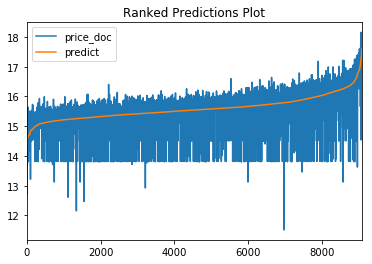

In [39]:
h2o_xgb_preds1_val = h2o_xgb_model.predict(valid)
ranked_preds_plot('price_doc', valid, h2o_xgb_preds1_val) 
h2o_xgb_preds1_test = h2o_xgb_model.predict(test)
#gen_submission(h2o_xgb_preds1_test) 

#  on public leaderboard

price_doc,predict
16.3881,15.8527
14.5087,15.4019
14.5087,15.2663
14.4307,15.488
15.6561,15.2926
15.8824,15.3378
15.4642,15.253
15.5905,15.1
16.7224,15.9562
15.556,15.276


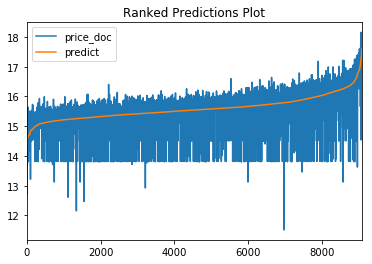

In [44]:
h2o_xgb_preds1_val = h2o_xgb_model.predict(valid)
ranked_preds_plot('price_doc', valid, h2o_xgb_preds1_val) 
h2o_xgb_preds1_test = h2o_xgb_model.predict(test)

In [40]:
# save the model
model_path = h2o.save_model(model=h2o_xgb_model, path="/Users/zwang/GWU/Kaggle/Housing_Mkt/mymodel2", force=True)

### load saved model

In [ ]:
# load data
train = h2o.import_file('/Users/zwang/GWU/Kaggle/Housing_Mkt/data/newtrain.csv')
valid = h2o.import_file('/Users/zwang/GWU/Kaggle/Housing_Mkt/data/newvalid.csv')
test = h2o.import_file('/Users/zwang/GWU/Kaggle/Housing_Mkt/data/newtest.csv')

In [ ]:
def get_type_lists(frame=train, rejects=['id', 'price_doc']):   
    nums, cats = [], []
    for key, val in frame.types.items():
        if key not in rejects:
            if val == 'enum':
                cats.append(key)
            else: 
                nums.append(key)                
    print('Numeric =', nums)                
    print()
    print('Categorical =', cats)
    
    return nums, cats

In [ ]:
encoded_combined_nums, cats = get_type_lists(frame=train)

In [41]:
# load the model
rf_model1 = h2o.load_model("/Users/zwang/GWU/Kaggle/Housing_Mkt/mymodel/rf_model")
ert_model1 = h2o.load_model("/Users/zwang/GWU/Kaggle/Housing_Mkt/mymodel/ert_model")
h2o_gbm_model = h2o.load_model("/Users/zwang/GWU/Kaggle/Housing_Mkt/mymodel/gbm_model")
#h2o_xgb_model2 = h2o.load_model("/Users/zwang/GWU/Kaggle/Housing_Mkt/mymodel2/xgb_model")

In [42]:
h2o_gbm_preds1_val = h2o_gbm_model.predict(valid)
h2o_gbm_preds1_test = h2o_gbm_model.predict(test)

In [48]:
rf_preds1_val = rf_model1.predict(valid)
rf_preds1_test = rf_model1.predict(test)

In [49]:
ert_preds1_val = ert_model1.predict(valid)
ert_preds1_test = ert_model1.predict(test)

In [ ]:
h2o_xgb_preds1_val = h2o_xgb_model2.predict(valid)
#ranked_preds_plot('price_doc', valid, h2o_xgb_preds1_val) 
h2o_xgb_preds1_test = h2o_xgb_model2.predict(test)

In [ ]:
h2o_xgb_model2

### Train H2O stacked ensemble

In [50]:
stack = H2OStackedEnsembleEstimator(training_frame=train, 
                                    validation_frame=valid,
                                    base_models=[rf_model1, ert_model1, 
                                                 h2o_gbm_model])

stack.train(x=encoded_combined_nums,
            y='price_doc',
            training_frame=train,
            validation_frame=valid)

# print model information/create submission
print(stack)

# stacking without xgb
# RMSE: 0.39708713580391003
# 0.32659 in public leaderboard

# stacking all four model
# 


OSError: Job with key $03017f00000132d4ffffffff$_ae96705963134e8ff53388092a66462e failed with an exception: java.lang.NullPointerException
stacktrace: 
java.lang.NullPointerException
	at hex.StackedEnsembleModel.checkAndInheritModelProperties(StackedEnsembleModel.java:265)
	at hex.ensemble.StackedEnsemble$StackedEnsembleDriver.computeImpl(StackedEnsemble.java:115)
	at hex.ModelBuilder$Driver.compute2(ModelBuilder.java:173)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1349)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:974)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1477)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)


In [ ]:
stack_preds1_val = stack.predict(valid)
ranked_preds_plot('price_doc', valid, stack_preds1_val) 
stack_preds1_test = stack.predict(test)
gen_submission(stack_preds1_test)

### Blending

In [46]:
import os

def pred_blender(dir_, files):
    
    """ Performs simple blending of prediction files. 
    
    :param dir_: Directory in which files to be read are stored.
    :param files: List of prediction files to be blended.
    
    """
    
    # read predictions in files list and cbind
    for i, file in enumerate(files):
        if i == 0:
            df = pd.read_csv(dir_ + os.sep + file).drop('price_doc', axis=1)
        col = pd.read_csv(dir_ + os.sep + file).drop('id', axis=1)
        col.columns = ['price_doc' + str(i)]
        df = pd.concat([df, col], axis=1)
        
    # create mean prediction    
    df['mean'] = df.iloc[:, 1:].mean(axis=1)
    print(df.head())
        
    # create time stamp
    time_stamp = re.sub('[: ]', '_', time.asctime())        
        
    # write new submission file    
    df = df[['id', 'mean']]
    df.columns = ['id', 'price_doc']
    
    # save file for submission
    sub_fname = wd+'/submission_' + str(time_stamp) + '.csv'
    df.to_csv(sub_fname, index=False)

In [47]:
# create blending
pred_blender(wd,
            ['submissionRF_Mon_Jun_19_22_31_58_2017.csv',
             'submissionERF_Mon_Jun_19_22_56_05_2017.csv',
             'submissionGBM_Tue_Jun_20_00_52_56_2017.csv',
             'submissionXGB2_Wed_Jun_21_08_32_32_2017.csv'])

      id    price_doc0    price_doc1    price_doc2    price_doc3          mean
0  30474  5.247417e+06  5.222947e+06  5.288612e+06  5.414453e+06  5.293357e+06
1  30475  8.301841e+06  8.325911e+06  8.611005e+06  8.420023e+06  8.414695e+06
2  30476  5.125878e+06  5.273051e+06  5.040201e+06  5.045863e+06  5.121248e+06
3  30477  5.770156e+06  5.719346e+06  5.696058e+06  5.963532e+06  5.787273e+06
4  30478  5.026728e+06  5.014547e+06  5.067373e+06  5.068685e+06  5.044333e+06


#### Shutdown H2O

In [57]:
# Shutdown H2O - this will erase all your unsaved frames and models in H2O
h2o.cluster().shutdown(prompt=True)

Are you sure you want to shutdown the H2O instance running at http://127.0.0.1:54321 (Y/N)? Y
H2O session _sid_b903 closed.
